In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../lib/")
sys.path.append("../China_IBTDM_effect/")
from datetime import datetime, timezone, timedelta
from matplotlib import ticker
import copy
import time, datetime
import validation
import ana_effect_ChinaCity
import importlib
importlib.reload(validation)
importlib.reload(ana_effect_ChinaCity)

<module 'ana_effect_ChinaCity' from '../China_IBTDM_effect\\ana_effect_ChinaCity.py'>

# 1. Verification of statistical data and LPR data

In [2]:
# 15分钟切片按照所有工作日来平均
validation.validation.cal_corr(getui_cv=[0.55145986,0.633350585,0.652632791,0.575142976,0.668999956,0.686870834,0.704543798],
                        lpr_cv=[0.585,0.594,0.724,0.563,0.664,0.682,0.677])

pearson correlation0.7908695299731264，spearman correlation0.7142857142857144.


D:\Software\anaconda\envs\COFFEE\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.7908695299731264
                            OLS Regression Results                            
Dep. Variable:                    LPR   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     8.350
Date:                Tue, 08 Apr 2025   Prob (F-statistic):             0.0342
Time:                        13:25:03   Log-Likelihood:                 13.702
No. Observations:                   7   AIC:                            -23.40
Df Residuals:                       5   BIC:                            -23.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1059      0.186 

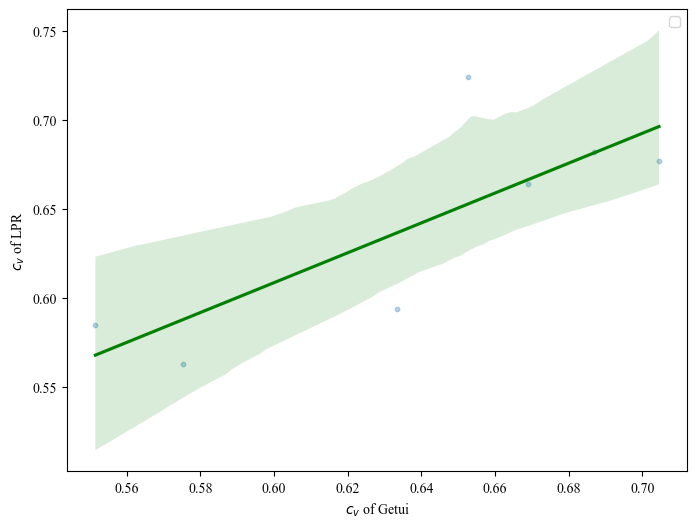

In [3]:
validation.validation.plot(file="../../data/China_IBTDM_effect/15minDataQualityAnalysis.xlsx")

# 2. National data deduction

In [16]:
ana_effect_ChinaCity.ana_effect.get_effect_15min(getui_cv_file="../../data/China_IBTDM_effect/15minCitycv.xls",sheetname='100个cv值',
                          rela1=ana_effect_ChinaCity.relation_congestioneffect_cv_15,rela2=ana_effect_ChinaCity.relation_enveffect_cv_15,
                          data_save_file="../../data/China_IBTDM_effect/15minChina_city_effect.csv")

# 3. Visualization of National Congestion Alleviation and Emission Reduction Effects

In [17]:
ana_effect_ChinaCity.ana_effect.plot_effect_congestion(effect_file="../../data/China_IBTDM_effect/15minChina_city_effect.csv",var_name='con_y',
                           save_file="../../data/China_IBTDM_effect/15minRelievecongestioneffect.html")
ana_effect_ChinaCity.ana_effect.plot_effect_env(effect_file="../../data/China_IBTDM_effect/15minChina_city_effect.csv",var_name='env_y',
                           save_file="../../data/China_IBTDM_effect/15minReducepollutioneffect.html")